                                     Statistical Analysis

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import Series, DataFrame
from scipy import stats
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
linreg = LinearRegression
%matplotlib inline

In [18]:
# importing dataset

df = pd.read_csv('C:/Users/drion/DFE_DATA4_ML/ML_Exercises/Linear Regression File/nyc-taxi3.csv', index_col=0)
print(df)

                tripDistance  hour_of_day  day_of_week  month_num  \
passengerCount                                                      
1.0                     9.40           15            2          1   
NaN                    14.75           13            4          1   
1.0                     3.35           23            4          1   
1.0                     3.33           18            2          1   
1.0                     0.47           17            6          1   
...                      ...          ...          ...        ...   
1.0                     7.47           13            2          6   
1.0                     3.76            0            3          6   
1.0                     3.45           14            5          6   
1.0                    20.20            1            6          6   
1.0                     3.03           18            6          6   

               normalizeHolidayName  isPaidTimeOff  snowDepth  precipTime  \
passengerCount           

In [19]:
# checking the first 5 rows

df.head()

,tripDistance,hour_of_day,day_of_week,month_num,normalizeHolidayName,isPaidTimeOff,snowDepth,precipTime,precipDepth,temperature,totalAmount
passengerCount,,,,,,,,,,,
1.0,9.40,15,2,1,None,False,29.058824,24.0,3.0,6.185714,44.30
NaN,14.75,13,4,1,None,False,0.000000,6.0,0.0,4.571930,44.80
1.0,3.35,23,4,1,None,False,0.000000,1.0,0.0,4.384091,18.96
1.0,3.33,18,2,1,None,False,29.058824,24.0,3.0,6.185714,16.30
1.0,0.47,17,6,1,None,False,0.000000,1.0,0.0,3.846429,5.30


                         Perform the following analysis on the dataset NYC Taxi Fare:
 Describe/Mean/Median/Mode/Correlation/P.Value

In [20]:
df.describe(include='all')

,tripDistance,hour_of_day,day_of_week,month_num,normalizeHolidayName,isPaidTimeOff,snowDepth,precipTime,precipDepth,temperature,totalAmount
count,11734.000000,11734.000000,11734.000000,11734.000000,11734,11734,11734.000000,11734.000000,11734.000000,11734.000000,11617.000000
unique,NaN,NaN,NaN,NaN,5,2,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,None,False,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,11484,11484,NaN,NaN,NaN,NaN,NaN
mean,2.866139,13.633884,3.223879,3.502898,NaN,NaN,1.609015,12.028379,190.782342,10.314244,14.724534
std,2.905810,6.670530,1.961855,1.707729,NaN,NaN,7.146771,10.158597,1211.087724,8.500600,10.966517
min,0.010000,0.000000,0.000000,1.000000,NaN,NaN,0.000000,1.000000,0.000000,-13.379464,3.300000
25%,1.060000,9.000000,2.000000,2.000000,NaN,NaN,0.000000,1.000000,0.000000,3.566372,8.150000
50%,1.900000,15.000000,3.000000,4.000000,NaN,NaN,0.000000,6.000000,3.000000,10.318229,11.300000
75%,3.620000,19.000000,5.000000,5.000000,NaN,NaN,0.000000,24.000000,41.000000,17.239744,17.800000


In [21]:
df.isnull().sum()

tripDistance              0
hour_of_day               0
day_of_week               0
month_num                 0
normalizeHolidayName      0
isPaidTimeOff             0
snowDepth                 0
precipTime                0
precipDepth               0
temperature               0
totalAmount             117
dtype: int64

In [22]:
df = df.fillna(0)

In [23]:
df.mean(numeric_only=True)

tripDistance       2.866139
hour_of_day       13.633884
day_of_week        3.223879
month_num          3.502898
isPaidTimeOff      0.021306
snowDepth          1.609015
precipTime        12.028379
precipDepth      190.782342
temperature       10.314244
totalAmount       14.577715
dtype: float64

In [24]:
df.median(numeric_only=True)

tripDistance      1.900000
hour_of_day      15.000000
day_of_week       3.000000
month_num         4.000000
isPaidTimeOff     0.000000
snowDepth         0.000000
precipTime        6.000000
precipDepth       3.000000
temperature      10.318229
totalAmount      11.300000
dtype: float64

In [25]:
df.mode()

,tripDistance,hour_of_day,day_of_week,month_num,normalizeHolidayName,isPaidTimeOff,snowDepth,precipTime,precipDepth,temperature,totalAmount
0,0.8,18,4,5,None,False,0.0,24.0,0.0,18.807432,6.8


In [26]:
df.corr()

,tripDistance,hour_of_day,day_of_week,month_num,isPaidTimeOff,snowDepth,precipTime,precipDepth,temperature,totalAmount
tripDistance,1.000000,-0.054169,0.024936,0.008597,0.013130,0.009923,-0.001689,-0.004524,0.020503,0.896552
hour_of_day,-0.054169,1.000000,-0.086562,-0.002458,-0.041185,0.016471,0.007831,0.010947,-0.015054,-0.026086
day_of_week,0.024936,-0.086562,1.000000,0.019255,-0.147402,-0.066260,-0.071852,-0.085533,0.016873,0.006233
month_num,0.008597,-0.002458,0.019255,1.000000,-0.115338,-0.301538,0.102491,-0.111110,0.832519,0.011123
isPaidTimeOff,0.013130,-0.041185,-0.147402,-0.115338,1.000000,-0.001425,0.068319,0.242770,-0.090847,-0.003575
snowDepth,0.009923,0.016471,-0.066260,-0.301538,-0.001425,1.000000,0.023557,0.057489,-0.233195,0.008870
precipTime,-0.001689,0.007831,-0.071852,0.102491,0.068319,0.023557,1.000000,0.172928,0.034417,0.002872
precipDepth,-0.004524,0.010947,-0.085533,-0.111110,0.242770,0.057489,0.172928,1.000000,-0.135116,-0.008211
temperature,0.020503,-0.015054,0.016873,0.832519,-0.090847,-0.233195,0.034417,-0.135116,1.000000,0.023233
totalAmount,0.896552,-0.026086,0.006233,0.011123,-0.003575,0.008870,0.002872,-0.008211,0.023233,1.000000


                                                            Pearson Values (P.Value)

 **P-value**: 
What is this P-value? The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant. 

By convention, when the 
- p-value is < 0.001 we say there is strong evidence that the correlation is significant,
- the p-value is < 0.05; there is moderate evidence that the correlation is significant,
- the p-value is < 0.1; there is weak evidence that the correlation is significant, and
- the p-value is > 0.1; there is no evidence that the correlation is significant.                                                           

In [27]:
p_value1 = 'totalAmount'
p_value1 = 'tripDistance'

pearson_coef, p_value = stats.pearsonr(df['totalAmount'], df['tripDistance'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.8965522126174372  with a P-value of P = 0.0


In [28]:
p_value1 = 'totalAmount'
p_value2 = 'hour_of_day'

pearson_coef, p_value = stats.pearsonr(df['totalAmount'], df['hour_of_day'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is -0.026086189555348926  with a P-value of P = 0.004714363870074573


In [29]:
p_value1 = 'totalAmount'
p_value2 = 'day_of_week'

pearson_coef, p_value = stats.pearsonr(df['totalAmount'], df['day_of_week'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.00623287135233512  with a P-value of P = 0.49961120087840816


In [30]:
p_value1 = 'totalAmount'
p_value2 = 'temperature	'

pearson_coef, p_value = stats.pearsonr(df['totalAmount'], df['temperature'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.023232520275769088  with a P-value of P = 0.011845913089889583


In [31]:
p_value1 = 'totalAmount'
p_value2 = 'snowDepth'

pearson_coef, p_value = stats.pearsonr(df['totalAmount'], df['snowDepth'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.008870061736488712  with a P-value of P = 0.33667614333936596


                                                    Exploration of Data using Charts
                                                    
Continuous numerical variables: 

Continuous numerical variables are variables that may contain any value within some range. Continuous numerical variables can have the type "int64" or "float64". A great way to visualize these variables is by using scatterplots with fitted lines. 

In order to start understanding the (linear) relationship between an individual variable and the price. We can do this by using "regplot", which plots the scatterplot plus the fitted regression line for the data.

Categorical variables:

These are variables that describe a 'characteristic' of a data unit, and are selected from a small group of categories. The categorical variables can have the type "object" or "int64". A good way to visualize categorical variables is by using boxplots.

In [32]:
# check the shape of the DataFrame (rows, columns)
df.shape

(11734, 11)

In [33]:
df.dtypes

tripDistance            float64
hour_of_day               int64
day_of_week               int64
month_num                 int64
normalizeHolidayName     object
isPaidTimeOff              bool
snowDepth               float64
precipTime              float64
precipDepth             float64
temperature             float64
totalAmount             float64
dtype: object

(0.0, 356.349)

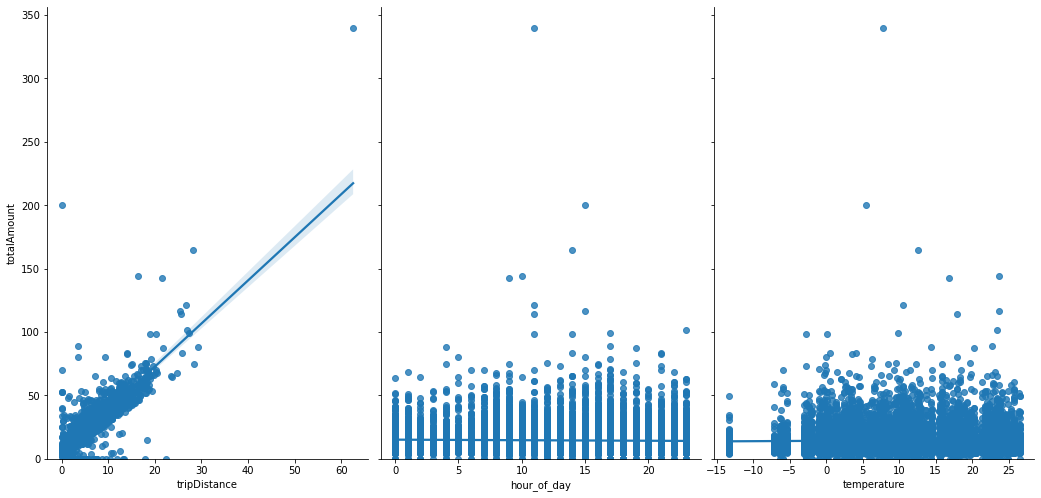

In [34]:
# visualising the relationship between the features and the response using SEABORN scatterplots

sns.pairplot(df, x_vars=['tripDistance','hour_of_day','temperature'], y_vars='totalAmount', height=7, aspect=0.7, kind='reg')
plt.ylim(0,)

<AxesSubplot:xlabel='month_num', ylabel='totalAmount'>

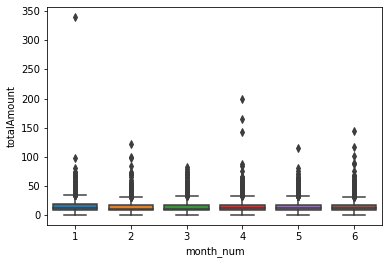

In [35]:
sns.boxplot(x='month_num', y='totalAmount', data=df)

<AxesSubplot:xlabel='day_of_week', ylabel='totalAmount'>

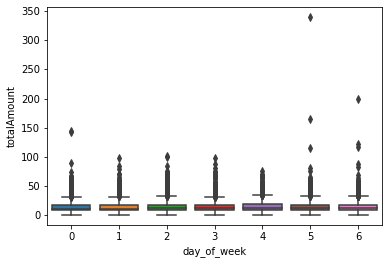

In [36]:
sns.boxplot(x='day_of_week', y='totalAmount', data=df)

                                                        CLEANING THE DATA                                                                 

In [37]:
# Replacing NaN with 0

df = df.fillna(0)
df.shape

(11734, 11)

In [38]:
df.isna().sum()

tripDistance            0
hour_of_day             0
day_of_week             0
month_num               0
normalizeHolidayName    0
isPaidTimeOff           0
snowDepth               0
precipTime              0
precipDepth             0
temperature             0
totalAmount             0
dtype: int64

#### Feature Selection and One-Hot Encoding with Bucket: Day of Week and Hour of /day

In [40]:
# finding the values of the column

df['hour_of_day'].unique()

array([15, 13, 23, 18, 17,  9, 12,  0,  2, 14, 19, 11, 10, 20,  1,  8, 22,
        4,  3,  5, 21,  7, 16,  6], dtype=int64)

In [41]:
bin = [-1, 6, 12, 18, 24]       # -1 is used so include the 0hour

In [42]:
df['day_of_week'].unique()

array([2, 4, 6, 1, 3, 0, 5], dtype=int64)